# This is Heart Disease Prediction Project
> we are going to predict based on the data whether someone have the heart disease or not

. 1-Problem Definition

. 2-Data

. 3-Evaluate

. 4-Feature

. 5-Modelling

. 6-Experimentation

# 1-Problem Definition
> Based on the given we need to prdict if a patient has heart disease or not

# 2-Data
> We have the data and have loaded it already


# 3-Evaluate
In initial stages we need to make sure, If our model gives us the accuracy of accuracy of 95%

# 4-Features
What features are important, what features columns means what

In [ ]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [ ]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing Tools and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import plot_roc_curve  #(not working)
# from sklearn.metrics import plot_roc_curve #(working)
from sklearn.metrics import roc_curve, auc # (by chatgpt)


# Exploring the Data Initial Stage
>1-What problem i am going to solve

>2-What kind of data I have

>3-Does this data have missing values

>4-Are ther any outliers, sporious vectors

>5-Can we add or remove some of the features

In [ ]:
df = pd.read_csv('/content/data_heart_1025.csv')    #here we have to put the file path
df.shape    #rows and coloum

(1025, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df['target'].value_counts()
#here 0 for without desease , 1 for deseases people

1    526
0    499
Name: target, dtype: int64

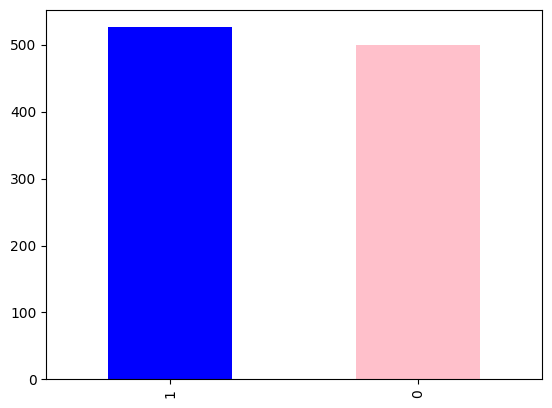

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['blue','pink']);

In [ ]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()   # 1 for female and 0 for male

1    713
0    312
Name: sex, dtype: int64

In [ ]:
len(df)

1025

In [ ]:
207/303   # almost 70% are female

0.6831683168316832

In [ ]:
97/303

0.3201320132013201

In [ ]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [ ]:
# Male patient in percent
72/96

0.75

In [ ]:
# Female patient in percent
93/207

0.4492753623188406

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

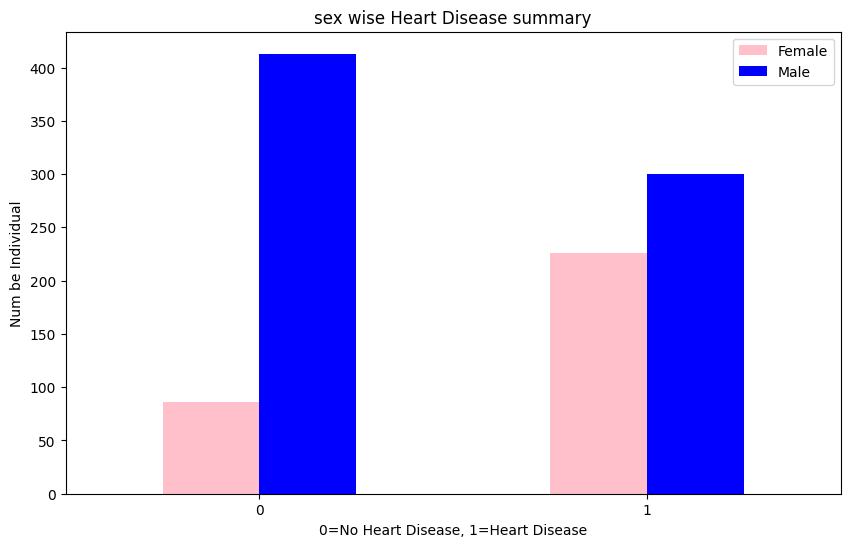

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['pink','blue'])
plt.title('sex wise Heart Disease summary')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

# 203.8 Be careful with plot choice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

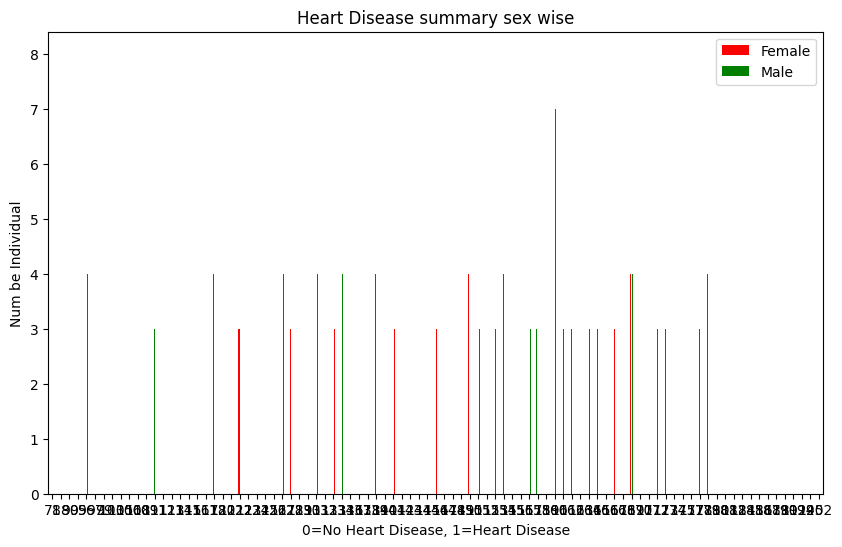

In [ ]:
# thalach = maximum heart rate
# Finding patterns in Data using Scatter Plot

# ekane onek beshi data tai valo vhabe dekabe na
pd.crosstab(df.thalach,df.age).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

In [ ]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

# 204.9: Scatter Plot to see any Pattern

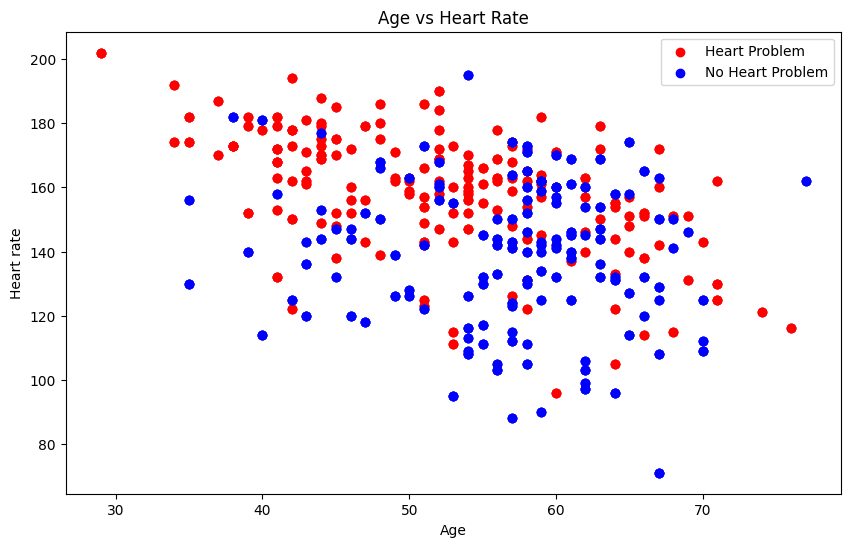

In [ ]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
# plt.scatter(df.age,df.thalach,c='green'); # for total data
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red'); # for those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue'); # for those who have not heart disease
# doing makeup hahahahahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem','No Heart Problem']);

# 205.10 : Age Distribution

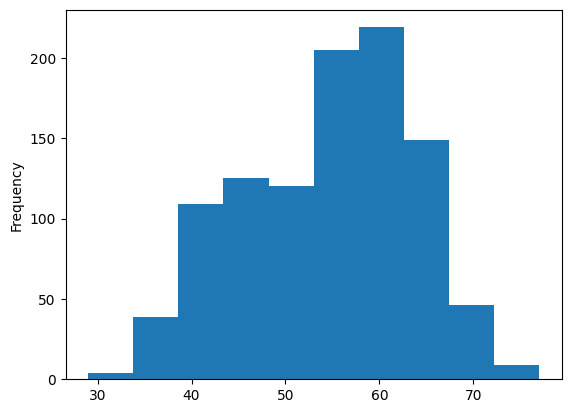

In [ ]:
# histogram plot from guasian distribution collect random sample
# result is down from perfect guasion distribution i.e Skeed
# histogram not only tell how much you deviate from perfect guasius distribution but all tell how many outliers presents

# Create histogram to see age Distribution
df.age.plot.hist();

#fhf : it is saying that with age increasing heart deasease will increase

# 206.11 : Chest pain type and target relation part 1

In [ ]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

cp: chest pain type

        -- Value 0: typical angina: chest pain due to decrease blood pressure.
        
        -- Value 1: atypical angina: Cheast pain not related to Heart Problem
        
        -- Value 2: non-anginal pain: Not Heart Related
        
        -- Value 3: asymptomatic: chest pain not showing Heart Problem

In [ ]:
# cross always between two tab(columns)
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


# 207.12 : Chest pain type and target relation part 2

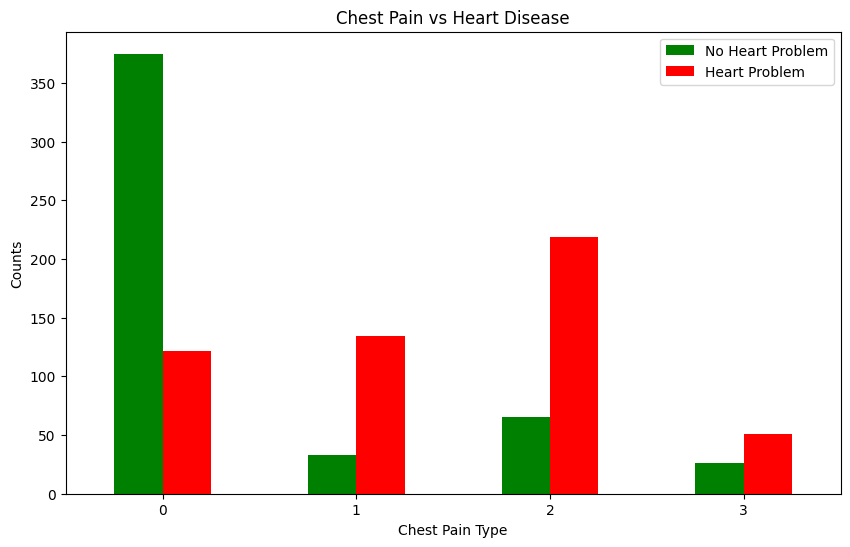

In [ ]:
# Making the bar chat of chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind='bar',
                              figsize=(10,6),
                              color=['green','red'])
# Make some discription of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem','Heart Problem']);
plt.xticks(rotation=0);

# 208.13: Correlation Matrix Part 1

In [ ]:
# ya sara matrix ka apes correlation dikhta hay
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.corr()
# Diagnel value : always one, one correlation with itself
# Maximum correlation : khud kay sath ko relation
# Positive correlation : one value increase and other also increase
# Negative correlation : one value increase and other decrease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# 208.13: Correlation Matrix Part 2

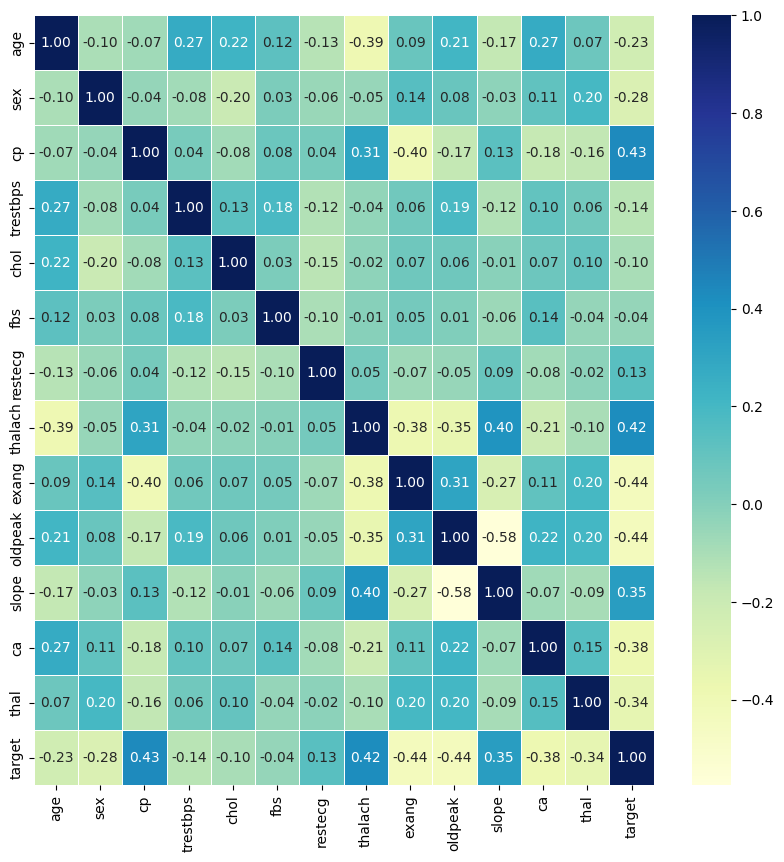

In [ ]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu'); # fmt: value after point two

In [ ]:
# 210.14 : Modelling split the data
# df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Split into test and train data
# axis=1 : means drop entire column
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
# see value of x
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
# see value of y
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x)

1025

In [ ]:
len(x_train)

820

In [ ]:
242/303

0.7986798679867987

# Search on google : sklearn google map (choose right estimator)
# also search for : best regression model for classification

# 211.16 : Choosing the right model

# The model we are going to use
>1-K-Nearest Neighbors Classifier

>2-Random Forest Classifier

>3-Logistic Regression

In [ ]:
# Putting the value into a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# def : is function
# fit_and_score : is model
# Random seed : for result reproduceble
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [ ]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

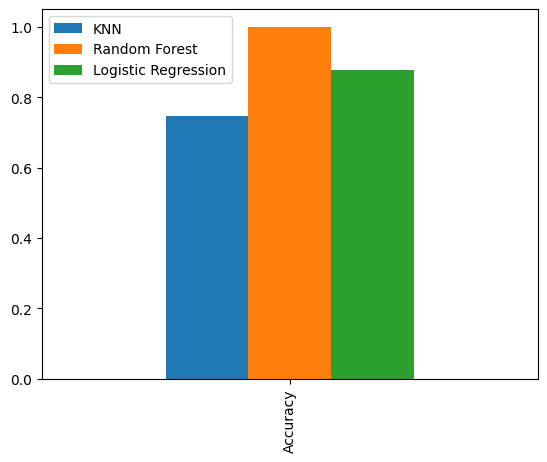

In [ ]:
# is ko bhter tarikay se represent kr saktay
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

# 212.17 : Improving Model

# Improving and Tuning the Model
>Universal Methods used for all Classification Problems

* Hyperparameter Tuning

* Features Improving # Touched yet

Advanced Level

* Confusion_matrix

* cross_validation

* Precision

* Recall

* f1

* classification Report

* ROC Curve


* Hyperparameter Tuning

* Features Improving

In [ ]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [ ]:
# below is function for a whole range hyperparameters ko test krata hay score 1 list k ander append krwa k deta hay or score test hota hay 1 to 30


# score k leyee empty matrix
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Set Parameter : ksi model k hyperparameter set krnay hotay hay na to ap kay pass jo command hoti hay
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for the value
    KNN.fit(x_train,y_train)
    # Update the training score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))

In [ ]:
train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

In [ ]:
test_score

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585]

# 213.18 : Plotting the Improve Model score

# Plot the Accuracy Score

Max KNN Score:98.05%


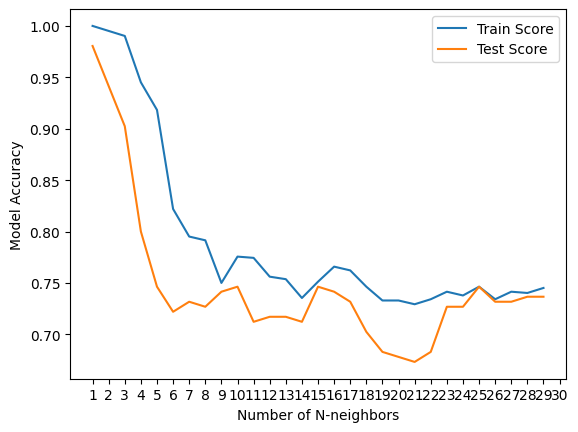

In [ ]:
plt.plot(nneighbors,train_score, label='Train Score')
plt.plot(nneighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,31,1))
# Static beauty
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend();
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

# Important : KNN not achieved our requirement so we go to next

# 214.19 : hyperparameter Tuning using GSCV

# Hyperparameter tuning using Randomized Search CV

* LogisticREgression()
* RandomForestClassifier()

# first of all we make the dictionary of hyperparameter of logisticRegression and RandomForestClassifier

# search on google for documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# making the dictionary with and value
# log basically is power of 10
# log is used for capturing small variation
# log is inverse of exponent

# hum nay log redhemic regression pay hyperparameter ka aik dictionary bna li

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

# 215.20 : hyperparameters for RandomForestClassifier

In [ ]:
# Just Google it :
# What are the best hyperparameter
# how to tune hyperpaprameter

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators':np.arange(10,1600,100),
    'max_depth':[None,3,5,6,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [ ]:
# tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP

# ya instant create kya hay Regression model ka (LogisticRegression)
# hyperparameters hay jo hum tune krna chtay hay(param_distibution)
# CV=5 : meray data ki 5 copies bna lo (or har copy kay ander say jo ap nay data test kay leyee lena hay us ko select krna hay mean har 5 copies may say 20 percent select kray ga)

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

# 216.21 : Runing the model with Hyperparemeters using GSCV

In [ ]:
lr.score(x_test,y_test)

0.8682926829268293

In [ ]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
# Tune Logistics Regression
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

# 217.22 : Score Comparison tuning

In [ ]:
rfc.score(x_test,y_test)
# below value after improvement of RandomForestClassifier

0.9317073170731708

In [ ]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 6}

* {'KNN': 0.5573770491803278, We have already dropped it
* 'Random Forest': 0.7213114754098361, After Hyperparameter Tuning = 0.7049180327868853
* 'Logistic Regression': 0.7377049180327869}, After Hyperparameter Tuning = 0.7540983606557377

* 1-By Hand Hyperparameter Tuning # Done it been there, seen it all
* 2-Randomized Search CV # Done it been there, seen it all
* 3-GridSearch CV # Lets try this one

# 217.23 : Hyperparameters Tuning Using Grid Search CV

In [ ]:
# tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
lr_gs.score(x_test,y_test)

0.8682926829268293

In [ ]:
lr_gs.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP
RFC2_hp = {
    'n_estimators':np.arange(1,101,50),
    'max_depth':[None,3,50],
    'min_samples_split':np.arange(2,8,2),
    'min_samples_leaf':np.arange(1,7,2)
}

rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                       param_grid=RFC2_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

# 219.24 : Summarizing

In [ ]:
rfc_gs.score(x_test,y_test)

0.9902439024390244

In [ ]:
 rfc_gs.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 51}

{'KNN': 0.5573770491803278, After Improving = 0.7049

'Random Forest': 0.7213114754098361, After Improving = 0.7377049180327869

'Logistic Regression': 0.7377049180327869}, After Improving = 0.7540983606557377

# Improving and Tuning the Model
>Universal Methods used for all Classification Problems

* Hyperparameter Tuning # Done

* Features Improving # not Touched yet

Advanced Level

* ROC Curve

* Confusion_matrix

* cross_validation

* Precision

* Recall

* f1

* classification Report


# 221.26 : Area under the curve

In [ ]:
# Not working

# # Plotting the area under the curve
# # we run the curve after the curve prediction so do it first
# lr_gs.predict(x_test)
# plot_roc_curve(lr_gs,x_test,y_test)

# By ChatGPT

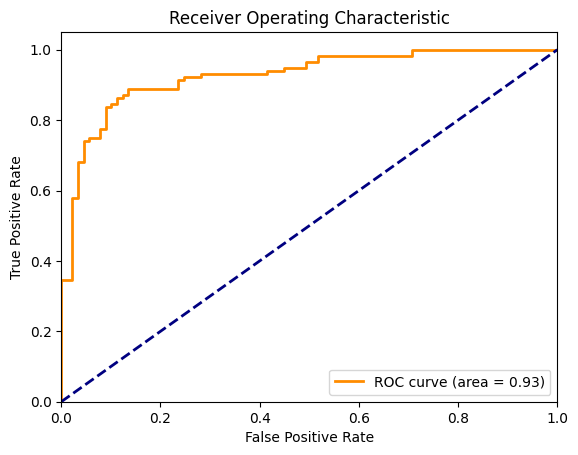

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained logistic regression model
y_scores = lr_gs.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# confusion matrix

In [ ]:
# print(confusion_matrix(y_test,y_scores))  # not working

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
threshold = 0.5  # Example threshold
y_pred = (y_scores > threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 75  14]
 [ 13 103]]


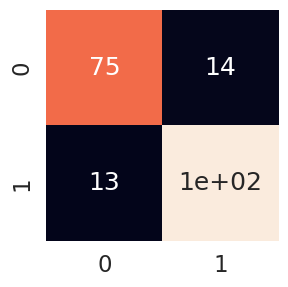

In [ ]:
# Drawing heat map with confusion matrix

sns.set(font_scale=1.5)

def plot_confusion(y_test,y_pred):
    'This plot is the confusion matrix'

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,
                    cbar=False)
plot_confusion(y_test,y_pred)

# 222.27 : Plot the classification report

# In Classification we get one train data set

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [ ]:
# Class_inbalance : salt in floor e.g: 1000 patient only 10 have heart disease find it
# Recall : maximium number of prediction cases must be in cluded in it.
# Precession : low (we you get maximum data of heart disease data wrong labelled as heart disease)
# f1 : is a combination of Recall and Precission
# Recall and Precission are inversely propotional


# 223.28 : Lets see if cross validation layers help us

# search on google: cross validation sklearn
https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
lr_gs.best_params_
# create instance
lr = LogisticRegression(C=0.615848211066026,
                       solver='liblinear')

In [ ]:
# Cross validation Accuracy

cv_accuracy = cross_val_score(lr,
                             x,
                             y,
                             cv=7, # cv=135,it give best result
                             scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8477574983026479

In [ ]:
# Cross validation precision
# precision value must be less than recall

cv_precision = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8192092236246103

In [ ]:
# Cross validation recall

cv_recall = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9030325814536341

In [ ]:
# Cross validation f1-score

cv_f1 = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8588107768610616

# 224.29 : Visulizing Cross Validation Score

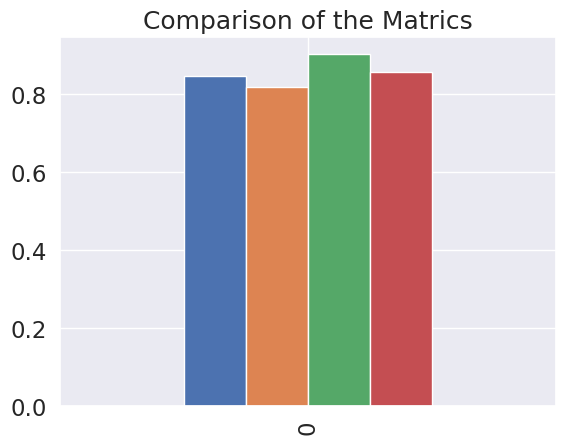

In [ ]:
#1.1 Sir remove it bout I hold it
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.plot.bar(title='Comparison of the Matrics',
                legend=False);

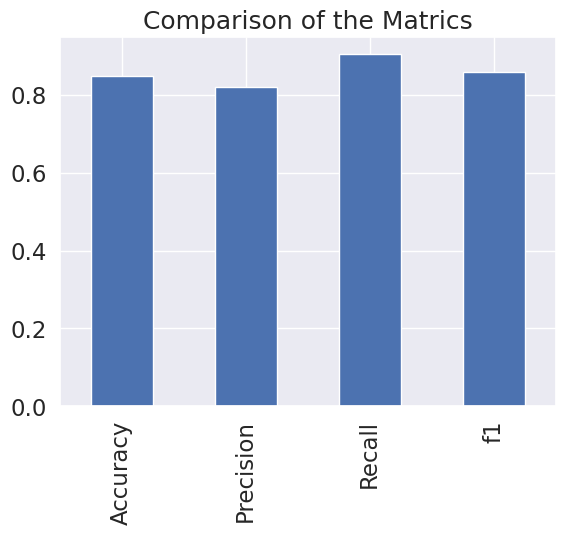

In [ ]:
#1.2
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.T.plot.bar(title='Comparison of the Matrics',
                legend=False);

# 225.30 : Features Improvement

In [ ]:
# ap kay data k wo attribute hay jo ap kay target ko aser andaz krtay hay
# Each column is attribute
# kon sa feature hamaray target pr aser andaz ho rha hay
# har column/feature ka effect hota hay hum nay nay un ko search krna hay tay k feature improve k sakain

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# check coffiecient
lr.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [ ]:
# coffiecient is little sister of coerrelatrix matrix
# ap ko btati hay k kon sa atribute corelate hay ap kay target k sath
# corelate matrix tell : k saray sub kay sth kitnay corelate hay
# coefficient tell : k saray target k sath kaisay corelate hay

In [ ]:
# check coffiecient
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.00297407, -1.81086545,  0.81765311, -0.01383961, -0.00532393,
        -0.31231838,  0.37836385,  0.03228936, -0.94453073, -0.45530757,
         0.55895723, -0.70228355, -0.77837727]])

In [ ]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef
# positive corelation : is a good sign (are good friend like)
# negative corelation : is a bad sign (are enemy like)

{'age': 0.0029740693329031306,
 'sex': -1.8108654543226455,
 'cp': 0.8176531137667338,
 'trestbps': -0.01383961371773988,
 'chol': -0.005323926961466042,
 'fbs': -0.3123183845723832,
 'restecg': 0.37836384634525183,
 'thalach': 0.03228935711633208,
 'exang': -0.9445307284403845,
 'oldpeak': -0.45530756927576094,
 'slope': 0.5589572299072197,
 'ca': -0.7022835481403825,
 'thal': -0.7783772730965594}

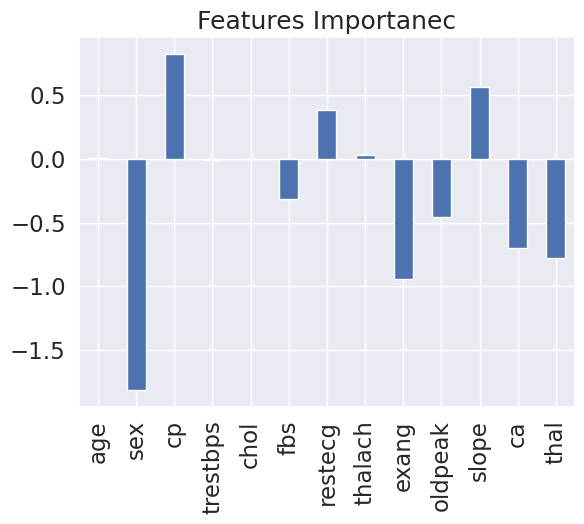

In [ ]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title='Features Importanec', legend=False);

In [ ]:
# corelate special feature : har feature ko har feature kay against compare krta hay vs All
# coefficient feature : har feature ko against the target compare krta hay vs Target
# positively corelate : both increase and decrease
# negitively corelate : one increase and other decrease

# 226.31 : Conclusion

* We set 95% accuracy goal, but we did not meet

* We can ask some Question
* What if we try to get more data
* what if we try to improve the quality of the data
* What if we try to use other models and see if there is any improvement